# ACRA results analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In this document, we perform the analysis and plots of the experiment in Section 3.4 of the paper. In particular, we reproduce those results using a single train-test splits.

##  Auxiliar functions

We define here the relevant metrics to be calculated for each experiment.

In [2]:
def postolabel(posterior, ut):
    aux = np.dot(ut, posterior.transpose())   
    return(np.argmax(aux, axis = 0))

In [3]:
def avgUt(y_true, y_pred, ut):
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    return( float(sum(ut[y_pred,y_true])) / float(len(y_true) ))

In [4]:
def acc(y_true, y_pred):
    return(accuracy_score(y_true, y_pred))

In [5]:
def FPR(y_true, y_pred):
    a = confusion_matrix(y_true, y_pred)
    return(float(a[0,1]) / float(sum(a[0,:])))

In [6]:
def FNR(y_true, y_pred):
    a = confusion_matrix(y_true, y_pred)
    return(float(a[1,0])/ float(sum((a[1,:]))))

## Results dataframe generation

For a given `N` and give `var`, this function reads the corresponding experiment, computes all relevant metrics, and returns a dataframe with the results.

In [7]:
def getMetrics(N, var):


    ut01 = [0, -2, -5, -10]
    columns = ["N", "var", "Ut01", "NBC_Acc", "ACRA_Acc", "NB_Acc", "NBC_AvgUt", "ACRA_AvgUt", "NB_AvgUt",\
               "NBC_FPR", "ACRA_FPR", "NB_FPR", "NBC_FNR", "ACRA_FNR", "NB_FNR"]
    resultsdf = pd.DataFrame(data=None, columns=columns)

    name = "BE" + "N" + str(N) + "var" + str(var) + ".csv"
    dataPath = "results/"
    data = pd.read_csv(dataPath + name)

    for i in range(len(ut01)):

        if ut01[i] == 0:
            ut = np.array([[1,0],[0,1]])
            NB_label = postolabel(data[["NBpost0", "NBpost1"]].values, ut)
            NBC_label = postolabel(data[["NBCpost0", "NBCpost1"]].values, ut)
            ACRA_label = postolabel(data[["ACRApost0", "ACRApost1"]].values, ut)

            resultsdf.loc[i] = [N, var, ut01[i], acc(data.spam.values, NBC_label), acc(data.spam.values, ACRA_label), \
                          acc(data.spam.values, NB_label), avgUt(data.spam.values, NBC_label, ut), \
                          avgUt(data.spam.values, ACRA_label, ut), avgUt(data.spam.values, NB_label, ut), \
                          FPR(data.spam.values, NBC_label), FPR(data.spam.values, ACRA_label),\
                          FPR(data.spam.values, NB_label), FNR(data.spam.values, NBC_label), \
                          FNR(data.spam.values, ACRA_label), FNR(data.spam.values, NB_label)]
        else:

            ut = np.array([[1,-1],[ut01[i],1]])
            NB_label = postolabel(data[["NBpost0", "NBpost1"]].values, ut)
            NBC_label = postolabel(data[["NBCpost0", "NBCpost1"]].values, ut)
            ACRA_label = postolabel(data[["ACRApost0", "ACRApost1"]].values, ut)

            resultsdf.loc[i] = [N, var, ut01[i], acc(data.spam.values, NBC_label), acc(data.spam.values, ACRA_label), \
                          acc(data.spam.values, NB_label), avgUt(data.spam.values, NBC_label, ut), \
                          avgUt(data.spam.values, ACRA_label, ut), avgUt(data.spam.values, NB_label, ut), \
                          FPR(data.spam.values, NBC_label), FPR(data.spam.values, ACRA_label),\
                          FPR(data.spam.values, NB_label), FNR(data.spam.values, NBC_label), \
                          FNR(data.spam.values, ACRA_label), FNR(data.spam.values, NB_label)]


    return(resultsdf)



In [27]:
getMetrics(0,10.0)

,N,var,Ut01,NBC_Acc,ACRA_Acc,NB_Acc,NBC_AvgUt,ACRA_AvgUt,NB_AvgUt,NBC_FPR,ACRA_FPR,NB_FPR,NBC_FNR,ACRA_FNR,NB_FNR
0,0.0,10.0,0.0,0.880104,0.903562,0.827107,0.880104,0.903562,0.827107,0.059322,0.031073,0.059322,0.216704,0.200903,0.354402
1,0.0,10.0,-2.0,0.880973,0.898349,0.827976,0.728063,0.778454,0.622068,0.055085,0.029661,0.055085,0.221219,0.216704,0.358916
2,0.0,10.0,-5.0,0.880973,0.899218,0.826238,0.654214,0.735882,0.544744,0.043785,0.025424,0.043785,0.239278,0.221219,0.381490
3,0.0,10.0,-10.0,0.873154,0.895743,0.817550,0.527368,0.650738,0.416160,0.039548,0.025424,0.039548,0.266366,0.230248,0.410835


## Compute metrics for all experiments

We compute the metrics for all experiments and write the results.

In [28]:
N = range(1)
var = [10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0]

result = getMetrics(0, 10.0)
for i in N:
    for j in var:
        if not (i == 0 and j == 10.0):
            tmp = getMetrics(i, j)
            result = result.append(tmp, ignore_index=True)

result.to_csv("results/whole.csv")

## Take mean values

We compute the average value of the ten experiments done under different training-test splits.

In [29]:
means = result.groupby(['var', 'Ut01'], as_index=False)["NBC_Acc", "ACRA_Acc", "NB_Acc", "NBC_AvgUt", "ACRA_AvgUt", "NB_AvgUt",\
               "NBC_FPR", "ACRA_FPR", "NB_FPR", "NBC_FNR", "ACRA_FNR", "NB_FNR"].mean()

means.to_csv("results/means.csv")

In [30]:
means

,var,Ut01,NBC_Acc,ACRA_Acc,NB_Acc,NBC_AvgUt,ACRA_AvgUt,NB_AvgUt,NBC_FPR,ACRA_FPR,NB_FPR,NBC_FNR,ACRA_FNR,NB_FNR
0,10.0,-10.0,0.873154,0.895743,0.817550,0.527368,0.650738,0.416160,0.039548,0.025424,0.039548,0.266366,0.230248,0.410835
1,10.0,-5.0,0.880973,0.899218,0.826238,0.654214,0.735882,0.544744,0.043785,0.025424,0.043785,0.239278,0.221219,0.381490
2,10.0,-2.0,0.880973,0.898349,0.827976,0.728063,0.778454,0.622068,0.055085,0.029661,0.055085,0.221219,0.216704,0.358916
3,10.0,0.0,0.880104,0.903562,0.827107,0.880104,0.903562,0.827107,0.059322,0.031073,0.059322,0.216704,0.200903,0.354402
4,20.0,-10.0,0.873154,0.890530,0.817550,0.527368,0.601216,0.416160,0.039548,0.032486,0.039548,0.266366,0.232506,0.410835
5,20.0,-5.0,0.880973,0.894005,0.826238,0.654214,0.704605,0.544744,0.043785,0.033898,0.043785,0.239278,0.221219,0.381490
6,20.0,-2.0,0.880973,0.893136,0.827976,0.728063,0.762815,0.622068,0.055085,0.038136,0.055085,0.221219,0.216704,0.358916
7,20.0,0.0,0.880104,0.895743,0.827107,0.880104,0.895743,0.827107,0.059322,0.042373,0.059322,0.216704,0.203160,0.354402
8,30.0,-10.0,0.873154,0.887924,0.817550,0.527368,0.596003,0.416160,0.039548,0.032486,0.039548,0.266366,0.239278,0.410835
9,30.0,-5.0,0.880973,0.893136,0.826238,0.654214,0.699392,0.544744,0.043785,0.035311,0.043785,0.239278,0.221219,0.381490


## Analysis Plots

In [31]:
def scatterPlot(x,y1,y2,y3,l, xl, yl, t,name):


    f,(ax,ax2) = plt.subplots(2,1,sharex=True, facecolor='w')
    
    
    # Autoscale y axis and set format en float
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    
    sns.set_style("whitegrid")
    # plot the same data on both axes
    ax.plot(x, y1, color = sns.xkcd_rgb["pale red"])
    ax.plot(x, y2, color = sns.xkcd_rgb["denim blue"])
    ax2.plot(x, y3, color = sns.xkcd_rgb["medium green"])

    ax.legend(labels=[l[0], l[1]])
    ax2.legend(handles=ax2.lines[::len(ut0["ACRA_Acc"])+1], labels=[l[2]])
    #ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
    plt.gcf().autofmt_xdate()
    ax2.set(xlabel=xl)
    ax2.set_ylabel(yl)
    ax2.yaxis.set_label_coords(0.04, 0.47, transform=f.transFigure)

    f.suptitle(t) 

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop='off')  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    

    d = .015  
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

 
    
    
    plt.savefig(name, format='eps', dpi=1000)

    return(plt)

In [32]:
def scatterPlot2(x,y1,y2,y3,l, xl, yl, t, name):


    f,(ax,ax2) = plt.subplots(2,1,sharex=True, facecolor='w')
    
    # Autoscale y axis and set format en float
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    
    sns.set_style("whitegrid")
    # plot the same data on both axes
    ax2.plot(x, y1, color = sns.xkcd_rgb["pale red"])
    ax2.plot(x, y2, color = sns.xkcd_rgb["denim blue"])
    ax.plot(x, y3, color = sns.xkcd_rgb["medium green"])

    ax2.legend(labels=[l[0], l[1]])
    ax.legend(labels=[l[2]])
    #ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
    plt.gcf().autofmt_xdate()
    ax2.set(xlabel=xl)
    ax2.set_ylabel(yl)
    ax2.yaxis.set_label_coords(0.04, 0.47, transform=f.transFigure)

    f.suptitle(t) 


    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.tick_top()
    ax2.tick_params(labeltop='off')  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()



    d = .015  
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

   
    plt.savefig(name, format='eps', dpi=1000)

    return(plt)

In [33]:
def scatterPlot3(x,y1,y2,y3,l, xl, yl, t, name):


    f,ax2 = plt.subplots(1,1,sharex=True, facecolor='w')
    sns.set_style("whitegrid")
    # plot the same data on both axes
    ax2.plot(x, y1, color = sns.xkcd_rgb["pale red"])
    ax2.plot(x, y3, color = sns.xkcd_rgb["medium green"])
    ax2.plot(x, y2, color = sns.xkcd_rgb["denim blue"])
    

    ax2.legend(labels=[l[0], l[1],l[2]])
    plt.gcf().autofmt_xdate()
    ax2.set(xlabel=xl)
    ax2.set_ylabel(yl)
    #ax.yaxis.set_label_coords(0.04, 0.47, transform=fig.transFigure)

    f.suptitle(t)
    
    plt.savefig(name, format='eps', dpi=1000)




    return(plt)

### Plot accuracies for different utilities

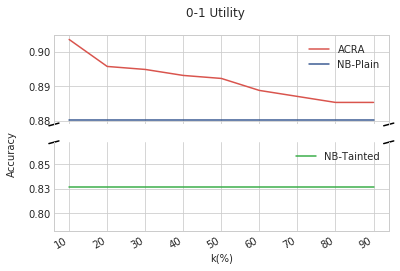

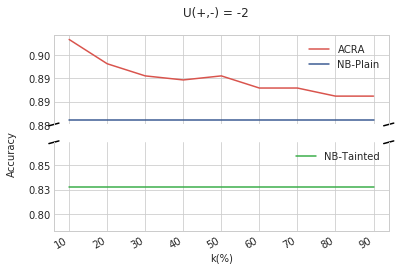

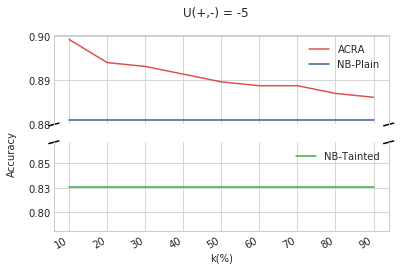

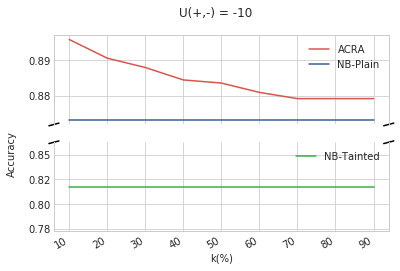

In [36]:
ut0 = means[means.Ut01 == 0.0]
ut0["var"]

p = scatterPlot(ut0["var"],ut0["ACRA_Acc"],ut0["NBC_Acc"],ut0["NB_Acc"],\
                ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Accuracy",\
               "0-1 Utility", "plots/accUt0.eps")

p.show()

#########################################################################################
#########################################################################################


ut2 = means[means.Ut01 == -2.0]
ut2["var"]
q = scatterPlot(ut1["var"],ut2["ACRA_Acc"],ut2["NBC_Acc"],ut2["NB_Acc"],\
                ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Accuracy",\
               "U(+,-) = -2","plots/accUt2.eps")

q.show()
#########################################################################################
#########################################################################################


ut5 = means[means.Ut01 == -5.0]
ut5["var"]
r = scatterPlot(ut5["var"],ut5["ACRA_Acc"],ut5["NBC_Acc"],ut5["NB_Acc"],\
                ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Accuracy",\
               "U(+,-) = -5", "plots/accUt5.eps")

r.show()
#########################################################################################
#########################################################################################


ut10 = means[means.Ut01 == -10.0]
ut10["var"]
s = scatterPlot(ut10["var"],ut10["ACRA_Acc"],ut10["NBC_Acc"],ut10["NB_Acc"],\
                ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Accuracy",\
               "U(+,-) = -10", "plots/accUt10.eps")

s.show()

### Plot average utility 

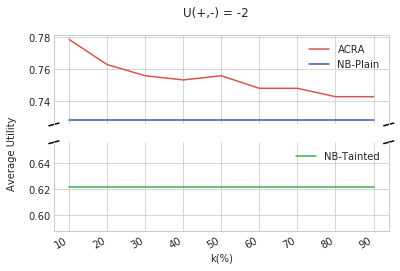

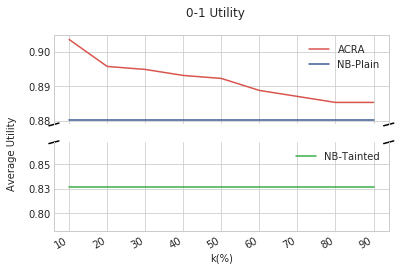

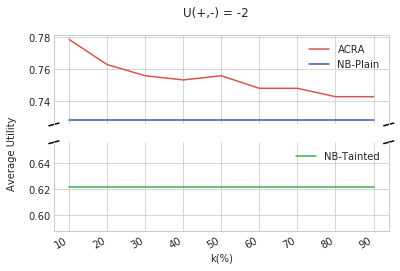

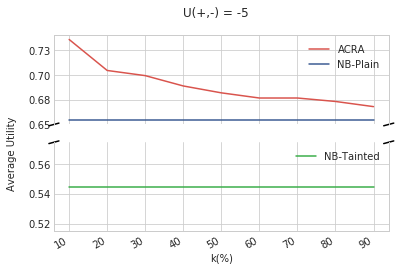

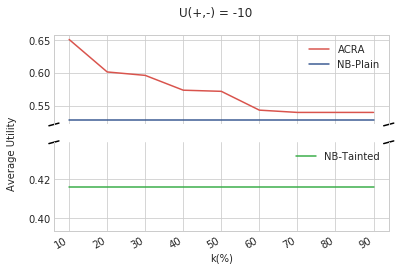

In [38]:
p = scatterPlot(ut0["var"],ut0["ACRA_AvgUt"],ut0["NBC_AvgUt"],ut0["NB_AvgUt"],\
                ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Average Utility",\
               "0-1 Utility", "plots/avut0.eps")

p.show()

#########################################################################################
#########################################################################################


q = scatterPlot(ut2["var"],ut2["ACRA_AvgUt"],ut2["NBC_AvgUt"],ut2["NB_AvgUt"],\
                ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Average Utility",\
               "U(+,-) = -2", "plots/avut2.eps")

q.show()
#########################################################################################
#########################################################################################


r = scatterPlot(ut5["var"],ut5["ACRA_AvgUt"],ut5["NBC_AvgUt"],ut5["NB_AvgUt"],\
                ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Average Utility",\
               "U(+,-) = -5", "plots/avut5.eps")

r.show()
#########################################################################################
#########################################################################################

s = scatterPlot(ut10["var"],ut10["ACRA_AvgUt"],ut10["NBC_AvgUt"],ut10["NB_AvgUt"],\
                ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "Average Utility",\
               "U(+,-) = -10", "plots/avut10.eps")

s.show()

### Plot FNR for different Utilities

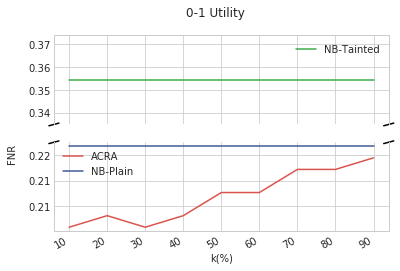

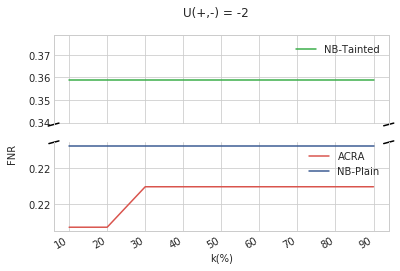

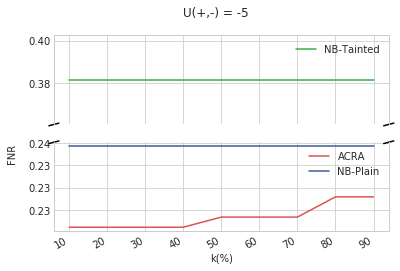

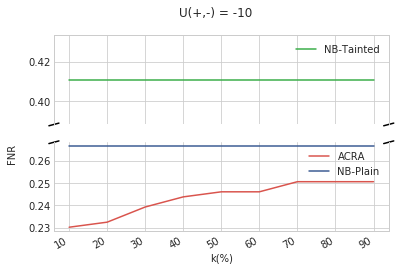

In [39]:
p = scatterPlot2(ut0["var"],ut0["ACRA_FNR"],ut0["NBC_FNR"],ut0["NB_FNR"],\
                 ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FNR",\
               "0-1 Utility", "plots/fnut0.eps")

p.show()

#########################################################################################
#########################################################################################


q = scatterPlot2(ut2["var"],ut2["ACRA_FNR"],ut2["NBC_FNR"],ut2["NB_FNR"],\
                 ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FNR",\
               "U(+,-) = -2", "plots/fnut2.eps")

q.show()
#########################################################################################
#########################################################################################


r = scatterPlot2(ut5["var"],ut5["ACRA_FNR"],ut5["NBC_FNR"],ut5["NB_FNR"],\
                 ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FNR",\
               "U(+,-) = -5", "plots/fnut5.eps")

r.show()
#########################################################################################
#########################################################################################

s = scatterPlot2(ut10["var"],ut10["ACRA_FNR"],ut10["NBC_FNR"],ut10["NB_FNR"],\
                 ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FNR",\
               "U(+,-) = -10", "plots/fnut10.eps")

s.show()

### Plot FPR for different Utilities

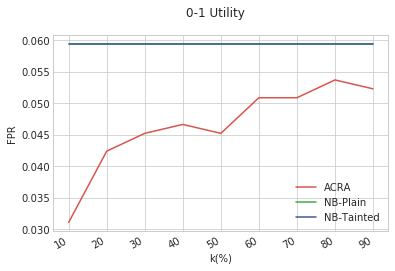

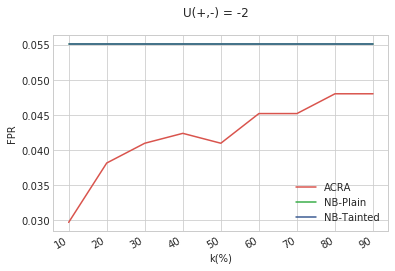

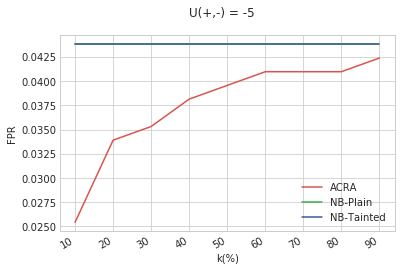

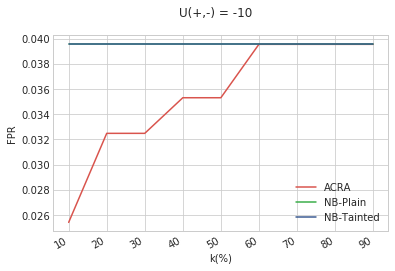

In [41]:
p = scatterPlot3(ut0["var"],ut0["ACRA_FPR"],ut0["NBC_FPR"],ut0["NB_FPR"],\
             ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FPR","0-1 Utility", \
                 "plots/fput0.eps")

p.show()

#########################################################################################
#########################################################################################


q = scatterPlot3(ut2["var"],ut2["ACRA_FPR"],ut2["NBC_FPR"],ut2["NB_FPR"], \
            ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FPR","U(+,-) = -2", \
                 "plots/fput2.eps")

q.show()
#########################################################################################
#########################################################################################


r = scatterPlot3(ut5["var"],ut5["ACRA_FPR"],ut5["NBC_FPR"],ut5["NB_FPR"], \
            ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FPR","U(+,-) = -5", \
                 "plots/fput5.eps")

r.show()
#########################################################################################
#########################################################################################

s = scatterPlot3(ut10["var"],ut10["ACRA_FPR"],ut10["NBC_FPR"],ut10["NB_FPR"], \
            ["ACRA", "NB-Plain", "NB-Tainted"], "k(%)", "FPR","U(+,-) = -10", \
                 "plots/fput10.eps")

s.show()
